In [16]:
import torch
import matplotlib.pyplot as plt

## Creating inputs and outputs of AND gate

In [70]:
x = torch.tensor([[0.,0],[0,1],[1,0],[1,1]])
y = torch.tensor([[0.],[0],[0],[1]])

In [88]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(2,1)
            
    def forward(self, x):
        return(torch.sigmoid(self.linear(x)))

In [89]:
model = Model()

In [90]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [91]:
epochs = 10000
loss_history = []

for i in range(epochs):
    y_pred = model(x)
    
    loss = criterion(y_pred, y)
    
    loss_history.append(loss.detach())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print("Loss: ",loss)

Loss:  tensor(0.0174, grad_fn=<BinaryCrossEntropyBackward>)


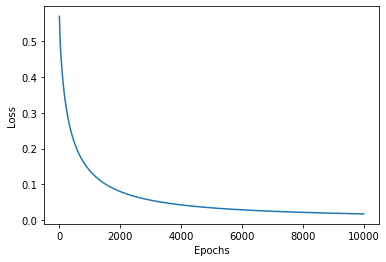

In [92]:
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [93]:
model(torch.tensor([0.,1]))

tensor([0.0202], grad_fn=<SigmoidBackward>)